In [7]:
import sys
import numpy as np
import scipy as sp

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
def visualize_hpds(hpd_list, p_true):
    fig = plt.gcf()
    fig.set_size_inches(12, 10)
    plt.plot(p_true, 'rx')
    plt.xticks(np.arange(5))
    for i in range(0, len(p_true)):
        offset = 0.05
        for hpd in hpd_list:
            hpd_p_i = hpd[i]
            l = hpd_p_i[0]
            u = hpd_p_i[1]
            plt.plot([i + offset, i + offset], [l, u], 'g-')
            offset += 0.1
    caption = "Bayesian credible set"
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

In [18]:
p_true = [0.005449538295062047, 0.027152097007631708, 0.035993849925836666, 0.10386919016452216, 0.11137458144738521, 0.1138456575845386, 0.14214047615195827, 0.14436300667314747, 0.1565701750816761, 0.15924142766824176]
hpd_rational = [
    (0.0088506 , 0.14809718),
    (0.04152906, 0.26453994),
    (0.06078839, 0.29677393),
    (0.09672957, 0.42574844),
    (0.14136653, 0.50255311),
    (0.30911626, 0.60542816),
    (0.41366803, 0.64146367),
    (0.49652293, 0.79046562),
    (0.5657712 , 0.82941841),
    (0.58584173, 0.98175314)
]

hpd_run_100 = [
    (0.00947217, 0.14247794),
    (0.07281478, 0.25905391),
    (0.16469915, 0.35408318),
    (0.25283933, 0.38331347),
    (0.28740191, 0.50309944),
    (0.34698255, 0.54880942),
    (0.45026229, 0.70312143),
    (0.53420847, 0.71604095),
    (0.62368252, 0.87201019),
    (0.631518  , 0.97130818)
]

hpd_run_1000 = [
    (0.00298355, 0.1417418 ),
    (0.03266746, 0.20379713),
    (0.13362758, 0.30572613),
    (0.17851972, 0.52710638),
    (0.21677205, 0.53069774),
    (0.31649356, 0.64458525),
    (0.34013623, 0.64480151),
    (0.4693951 , 0.76663556),
    (0.51740534, 0.86120051),
    (0.56888717, 0.90862937)
]

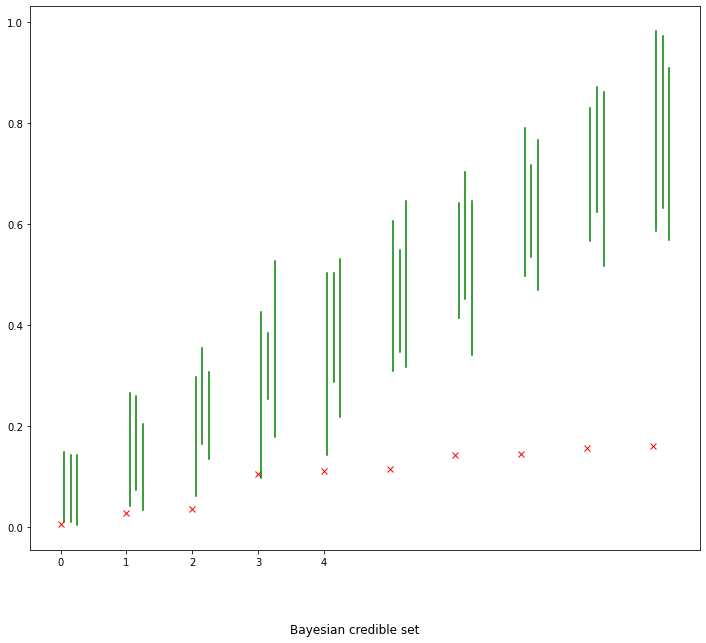

In [19]:
visualize_hpds([hpd_rational, hpd_run_100, hpd_run_1000], p_true)

In [59]:
def visualize_costs(cost1, label1, cost2, label2, title):
    fig = plt.gcf()
    plt.title(title)
    plt.xlabel("Bees model")
    plt.ylabel("Time taken (seconds)")
    plt.ylim(top=20)
    plt.xticks(np.arange(4), ('3 bees', '5 bees', '10 bees', '15 bees'))
    line1, = plt.plot(np.arange(4), cost1)
    line2, = plt.plot(np.arange(4), cost2)
    plt.legend([line1, line2], [label1, label2])
    plt.show()

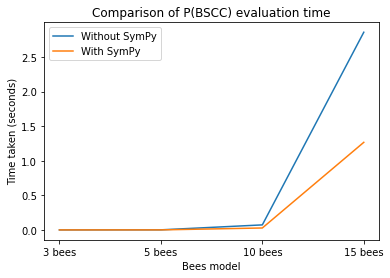

In [48]:
cost1 = [0.000405, 0.001482, 0.072944, 2.856321]
cost2 = [0.000354, 0.000807, 0.028215, 1.265711]
visualize_costs(cost1, 'Without SymPy', cost2, 'With SymPy','Comparison of P(BSCC) evaluation time')

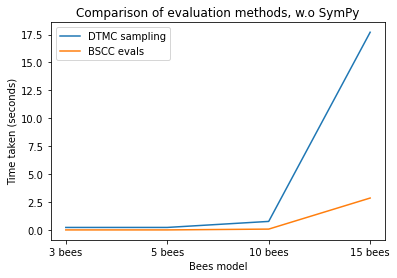

In [51]:
cost2 = [0.000405, 0.001482, 0.072944, 2.856321]
cost1 = [0.221461, 0.222605, 0.761924, 17.705747]
visualize_costs(cost1, 'DTMC sampling', cost2, 'BSCC evals','Comparison of evaluation methods, w.o SymPy')

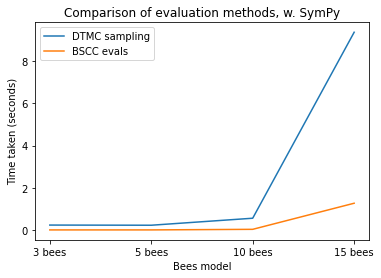

In [53]:
cost2 = [0.000354, 0.000807, 0.028215, 1.265711]
cost1 = [0.230183, 0.222605, 0.554515, 9.3730234]
visualize_costs(cost1, 'DTMC sampling', cost2, 'BSCC evals','Comparison of evaluation methods, w. SymPy')

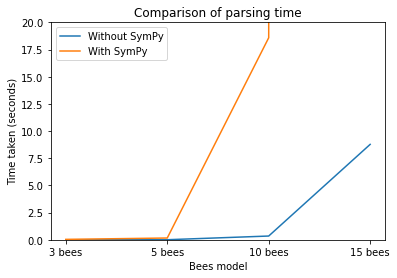

In [60]:
cost1 = [0.001997, 0.007577, 0.346381, 8.776479]
cost2 = [0.039738, 0.163901, 18.583382, 10124.570978]
visualize_costs(cost1, 'Without SymPy', cost2, 'With SymPy','Comparison of parsing time')

In [63]:
def visualize_HPD(title, hpd_list, p_true, caption):
    fig = plt.gcf()
    fig.set_size_inches(12, 10)
    plt.title(title)
    plt.xlabel("Chain parameters")
    plt.ylabel("Parameter's domain")
    plt.xticks(np.arange(5), ('r_0', 'r_1', 'r_2', 'r_3', 'r_4'))
    plt.plot(p_true, 'rx')
    plt.xticks(np.arange(5))
    for i in range(0, len(p_true)):
        offset = 0.05
        for hpd in hpd_list:
            hpd_p_i = hpd[i]
            l = hpd_p_i[0]
            u = hpd_p_i[1]
            plt.plot([i + offset, i + offset], [l, u], 'g-')
            offset += 0.1
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

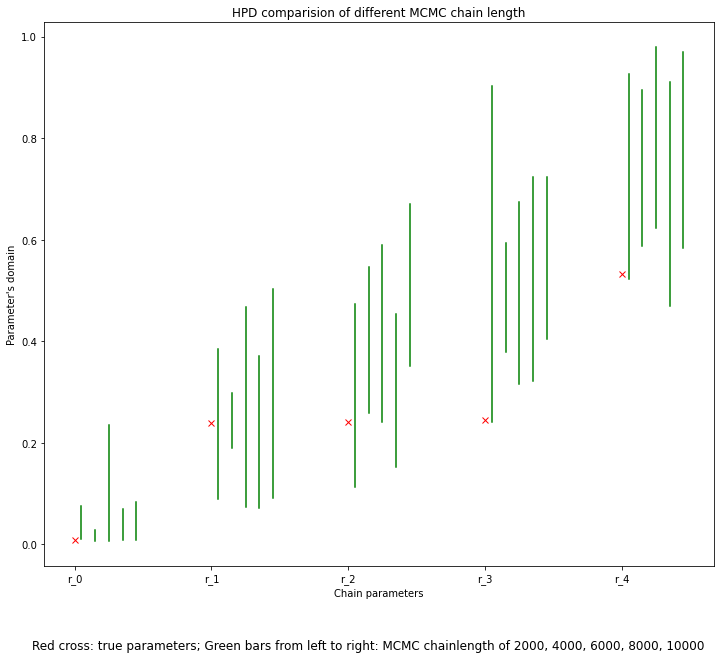

In [65]:
title = 'HPD comparision of different MCMC chain length'
caption = 'Red cross: true parameters; Green bars from left to right: MCMC chainlength of 2000, 4000, 6000, 8000, 10000'
p_true = [0.009551926831869229, 0.23886568030814348, 0.24115233254617607, 0.24408351753434665, 0.532078606391074]
hpd2 = [
    (0.01084784301554889, 0.07612119323434999),
    (0.08947082517669776, 0.3854815082505996),
    (0.11209252090530188, 0.4728267536425849),
    (0.24045217473010047, 0.9037996002312462),
    (0.5222810624088515, 0.9256615657076082)
]
hpd4 = [
    (0.00677817070501133 ,0.02810061872095937),
    (0.18884956790261032 ,0.29770023618969943),
    (0.2593221631677354  ,0.5463739147258427),
    (0.37832793805890663 ,0.5935057205782583),
    (0.5880567413229767  ,0.8941311091954941)
]
hpd6 = [
    (0.0060309451123833685, 0.23542769068348424),
    (0.07433174913686508  , 0.46699059055783415),
    (0.24061089635699015  , 0.5901281396666073),
    (0.3157943399067697   , 0.6745191002916334),
    (0.623899516336489    , 0.9794744415512175)
]
hpd8 = [
    (0.00845662565740484 ,0.06951151619972784),
(0.07232805003936103 ,0.3704402147596993) ,
(0.1530065137448595  ,0.4535882479405976) ,
(0.3219036888343153  ,0.7235597094831809) ,
(0.47046364620897674 ,0.9108097784596935)
]
hpd10 = [
    (0.009483596845056019, 0.08403332359296353),
(0.09203693951617518 , 0.5036707101146093) ,
(0.350545393887519   , 0.6694927814570628) ,
(0.4042033702193041  , 0.7226910144606187) ,
(0.5843908158740347  , 0.9704392405418758)
]
visualize_HPD(title, [hpd2, hpd4, hpd6, hpd8, hpd10], p_true, caption)

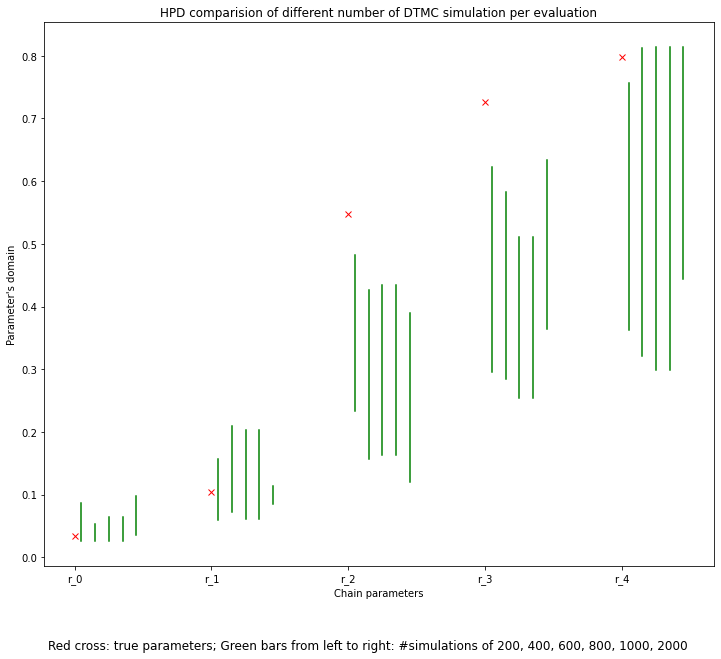

In [68]:
title = 'HPD comparision of different number of DTMC simulation per evaluation'
caption = 'Red cross: true parameters; Green bars from left to right: #simulations of 200, 400, 600, 800, 1000, 2000'
p_true = [0.033788049511423, 0.10332722593522348, 0.547648536701964, 0.7270400092393097, 0.7977882851122897]
hpd2 = [
(0.026726025717258718, 0.08595901953467797),
(0.05964744670959909, 0.15711098284762726),
(0.23337955730268453, 0.48146863413989166),
(0.2949423697756414, 0.6230253677987526),
(0.3622837628956655, 0.7561040790001858)
]
hpd4 = [
(0.02546616918045115, 0.05286868273723721),
(0.07286998753537928, 0.209119645919082),
(0.15625469746986714, 0.4269242695136172),
(0.2838935343554095, 0.5835025007237857),
(0.32049041008762374, 0.8129611512716771)
]
hpd6 = [
(0.025704808514048206, 0.06438544230859078),
(0.061686385774654684, 0.2037811627737707),
(0.16246162256158916, 0.4348033441259275),
(0.2534611829769235, 0.5112027186614596),
(0.2992593845877024, 0.81387863561215)
]
hpd8 = [
(0.025704808514048206 ,0.06438544230859078),
(0.061686385774654684 ,0.2037811627737707),
(0.16246162256158916, 0.4348033441259275),
(0.2534611829769235, 0.5112027186614596),
(0.2992593845877024, 0.81387863561215),
]
hpd10 = [
(0.03527875576433315, 0.09813173655566673),
(0.08550011069659509, 0.11341879419399367),
(0.12074623576090796, 0.38934469422098067),
(0.36450739084634226, 0.6330057907284314),
(0.44400737763345555, 0.8137730379766266),
]
hpd20 = [
(0.03380732222861175, 0.09627430897505977),
(0.06352516369971949, 0.2794009860401614),
(0.1594340404877556, 0.48902474421863334),
(0.2705430032595145, 0.619941493201444),
(0.33653349051318615, 0.6230271309333516),
]
visualize_HPD(title, [hpd2, hpd4, hpd6, hpd8, hpd10], p_true, caption)